In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
mnist=tf.keras.datasets.fashion_mnist

In [3]:
(train_img,train_label),(test_img,test_label)=mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

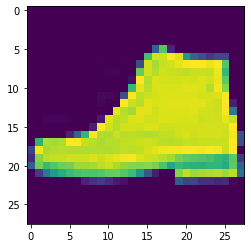

In [4]:
# Display one image
import matplotlib.pyplot as plt
plt.imshow(train_img[42])
print(train_label[42])
print(train_img[42])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

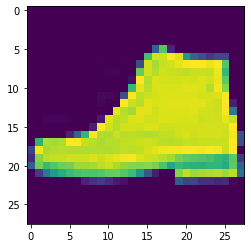

In [5]:
#Normalize the image
train_img=train_img/255
test_img=test_img/255
plt.imshow(train_img[42])
print(train_img[42])

In [6]:
#Model Construction with three layers
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128,activation=tf.nn.relu))
model.add(layers.Dense(10,activation=tf.nn.softmax))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy')
model.fit(train_img,train_label,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5281
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4357
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4113
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3989
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3931


In [10]:
#MOdel Training with callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("Loss is low so cancelling tarining: ")
      self.model.stop_training=True

In [12]:
callbacks=myCallback()
model.fit(train_img,train_label,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3782


In [13]:
model.evaluate(test_img,test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.5297


0.5296945571899414

# **Exploration Exercises**
Exercise 1:

For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [ ]:
classifications = model.predict(test_img)

print(classifications[0])

[5.5539731e-06 5.9726929e-08 3.9493530e-05 4.4410841e-05 4.3243977e-05
 9.3696684e-02 3.4221201e-04 1.5265866e-01 1.9144698e-03 7.5125527e-01]


In [ ]:
print(test_label[0])

9


# **Grading Excercise**

In [30]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.9):
          print("Accuracy reached 90% and above hence stop training: ")
          self.model.stop_training=True

    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    
    # YOUR CODE SHOULD START HERE
    x_train=x_train/255
    x_test=x_test/255
    # YOUR CODE SHOULD END HERE
    callback=myCallback()
    model = tf.keras.models.Sequential([
       tf.keras.layers.Flatten(input_shape=(28,28)),
       tf.keras.layers.Dense(512,activation=tf.nn.relu),
       tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(x_train,y_train,epochs=50,callbacks=callback    )
    # model fitting
  #  model.evaluate(x_test,y_test)
    return history.epoch, history.history['accuracy'][-1]

In [31]:
train_mnist()

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0995 - accuracy: 0.9698


([0], 0.9415666460990906)

In [27]:
model.evaluate(x_test,y_test)

NameError: ignored